# **Pandas Notebook**

---
###### ${By \ Pedro\ Magalhães\ \& \ Rafaella\ Ferraz}$

# **Introduction**

*Pandas* is a widely used Python package for data manipulation. It is based on the *numpy* package, which allows the manipulation of multidimensional *arrays* and matrices, along with a vast collection of mathematical and statistical functions. The main difference between *numpy* and *pandas* lies in the level of abstraction. *Numpy* has a medium level of abstraction, while *pandas* has a high level. In other words, the further away an algorithm or a language is from machine code and the closer it gets to human language, the higher its level of abstraction.

Shall we verify this with a practical example?

First, let's import the *numpy* and *pandas* packages, with aliases (nicknames) 'np' and 'pd,' respectively.

(Numpy version: 1.23.5, Pandas version: 1.5.3)

In [ ]:
import numpy as np
import pandas as pd

Now, we can call the methods available in *numpy* and *pandas* using the objects 'np' and 'pd,' respectively.

First, let's create an array with *n* zeros in *numpy* and assign it to the 'arr' object:

In [ ]:
n = 5
arr = np.zeros(n)
arr

array([0., 0., 0., 0., 0.])

Notice that an *array* with 5 zeros was created.

Unlike a list, a *numpy array* has a range of mathematical functions and transformations that can be easily applied to the 'array' object.

We won't delve into this domain because our focus is on *pandas*, but it's important to have some knowledge of its predecessor, right?

So, without further ado, let's create a similar object to *arr*, a one-dimensional vector, but using *pandas*. An *array* in *pandas* is called a *Series* and can be created with the *pandas.Series()* method, in our case, *pd.Series()*.

In [ ]:
series = pd.Series(arr)
series

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

Notice that the created *Series* object is more human-readable. Each row has an identifier (0, 1, 2, ...) that we call an *index*, and a *Series* object also has a data type: *string*, *float*, *int*, etc. This helps *pandas* understand what type of data is expected in that *Series*, and consequently, what type of operations can be performed on it. The *index* can be either integers or *strings*, similar to dictionary keys.

Let's talk about the *DataFrame* object, which will be quite useful. Basically, a *DataFrame* is a collection of *Series*, similar to a table. *DataFrames* are equivalent to *numpy* arrays, but they have only two dimensions: *index* (as mentioned earlier) and *columns*.
Let's create a *DataFrame* using two *Series* of equal sizes from two lists.

In [ ]:
# Creating lists
list1 = ["A", "C", "T", "G"]
list2 = ["Adenine", "Cytosine", "Tyrosine", "Guanine"]

In [ ]:
# Creating Series
series1 = pd.Series(list1)
series1

0    A
1    C
2    T
3    G
dtype: object

In [ ]:
series2 = pd.Series(list2)
series2

0     Adenine
1    Cytosine
2    Tyrosine
3     Guanine
dtype: object

Notice that the data type (*dtype*) of the *Series* is 'object.' We'll talk more about this later.

Now let's create the *DataFrame* using the pandas.DataFrame() function.

In [ ]:
df = pd.DataFrame([series1, series2])
df

,0,1,2,3
0,A,C,T,G
1,Adenine,Cytosine,Tyrosine,Guanine


Well, that wasn't quite what we expected, right? No worries, we can simply use the *transpose()* function of the DataFrame to make things right.

In [ ]:
df = df.transpose()
df

,0,1
0,A,Adenine
1,C,Cytosine
2,T,Tyrosine
3,G,Guanine


Perfect!

Now we just need to set the column names. We can do this by using a list and assigning it to the 'columns' attribute of the *DataFrame*.

In [ ]:
columns = ["acronym", "nucleotide"]
df.columns = columns
df

,acronym,nucleotide
0,A,Adenine
1,C,Cytosine
2,T,Tyrosine
3,G,Guanine


Finally, let's learn how to create the same *DataFrame* using a dictionary in a more direct way.

In [ ]:
dictionary = {
    "acronyms": ["A", "C", "T", "G"],
    "nucleotides": ["Adenine", "Cytosine", "Tyrosine", "Guanine"]
}

In [ ]:
df = pd.DataFrame(dictionary)
df

,acronyms,nucleotides
0,A,Adenine
1,C,Cytosine
2,T,Tyrosine
3,G,Guanine


Commonly, the data we work with in *DataFrames* comes from files (CSV, XLS, etc.), but it's possible to create *DataFrames* from other sources.

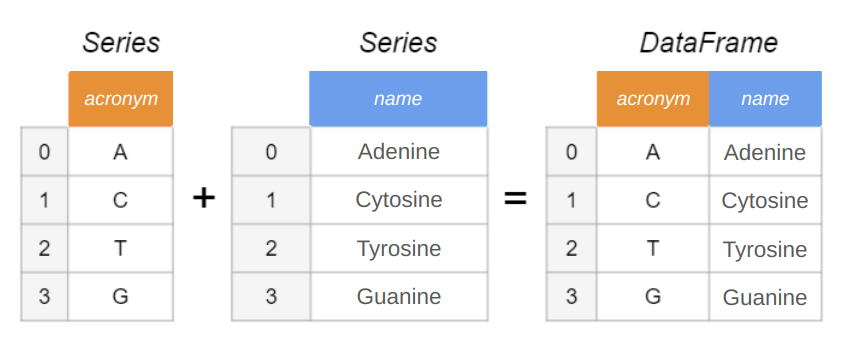

![Dataframe](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)
Reference: https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png

### Pandas Cheat Sheet
[PDF](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

###Summary

We've seen that *pandas* has two main objects: *Series* and *DataFrames*.

*Series* are similar to one-dimensional arrays, while *DataFrames* are similar to tables or a collection of *Series*.

Now that we've learned about the main objects in *pandas* (*Series* and *DataFrames*), let's dive deeper into them using real data."

## Case Study - Larval Dispersal of Strains

**Analysis**

Next, using *pandas*, we will perform an exploratory analysis using data from Dr. José Bruno Malaquias on larval dispersal of strains (Resistant and Susceptible) of a caterpillar species (*Spodoptera frugiperda*) on two varieties of cotton (WS and NBT).


**Context:**

The fall armyworm (_Spodoptera frugiperda_), is an agricultural pest insect with a high dispersal capacity during the cultivation period and a wide range of hosts, including cotton.

Over the years, several researchers have been investigating solutions to combat these pest insects. One of the alternatives that has garnered attention is the use of pathogenic bacteria with potential control over agricultural and urban pests, among them the bacterium _Bacillus thuringiensis_ (Bt) has stood out.

The effectiveness and specificity of Bt strains and their toxins in controlling pest insects have favored the formulation of biopesticides based on this pathogen. Furthermore, later on, the genes encoding the insecticidal action toxins of these bacteria were also isolated and incorporated into plants, generating Bt transgenic plants.

In this context, Bt cotton has been produced to combat pest insects, including the fall armyworm (_S. frugiperda_). However, in recent decades, there has been a failure in controlling this pest through this system.

One of the pieces of evidence for this failure is cross-contamination between different plant species or gene flow between Bt and non-Bt varieties. Depending on the degree of contamination and whether _S. frugiperda_ larvae move between plants in a field, the generation of resistant larvae can be accelerated.

Another piece of evidence for larval survival in Bt plants is the brief exposure time during which the insect does not ingest a sufficient amount of insecticidal proteins to cause mortality before metamorphosing into the pupal stage.

Furthermore, genetically modified plants that are resistant to insects can affect the feeding behavior, locomotion, and dispersal of these insect larvae.

**Reference:**

Malaquias, J. B., Godoy, W. A., Garcia, A. G., Ramalho, F. D. S., & Omoto, C. (2017). Larval dispersal of Spodoptera frugiperda strains on Bt cotton: a model for understanding resistance evolution and consequences for its management. Scientific reports, 7(1), 1-10.

Reading Data from a CSV

In [ ]:
import pandas as pd

df = pd.read_csv("larval_dispersion_strains.csv")
df

,Cultivar,Lineage,Time,Repetition,Dispersion Rate,Survival
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
...,...,...,...,...,...,...
59,NBT,Res,18,4,0.2308,0.8089
60,NBT,Res,24,1,0.0000,0.4978
61,NBT,Res,24,2,0.6667,0.2933
62,NBT,Res,24,3,0.5714,0.8089


As noted above, the DataFrame has 64 rows and 6 columns, where:

*   Column 1: Cotton Cultivar
*
      WS: Bt cotton
      NBT: non-Bt cotton

*   Column 2: Larval Strains of *S. frugiperda*
*
      Sus: Susceptible to the action of the insecticidal toxin Cry1F
      Res: Resistant to the action of the insecticidal toxin Cry1F


*   Column 3: Artificial Infestation Time
*
      6: six hours of cotton exposure to larval action
      12: twelve hours of cotton exposure to larval action
      18: eighteen hours of cotton exposure to larval action
      24: twenty-four hours of cotton exposure to larval action

*   Column 4: Repetition (=larvae) per treatment to evaluate the distance and speed traveled by the larvae. Measurement units for each parameter: distance movement (cm), mean velocity (cm/s), and continuous mobility period (s)
*
      1: measurement of one larva
      2: measurement of two larvae
      3: measurement of three larvae
      4: measurement of four larvae
      


*   Column 5: Dispersion Rate

*   Column 6: Survival Rate

We're going to modify the column names slightly by removing accents and spaces and converting everything to lowercase.

This will make it easier to explore and analyze the data.

In [ ]:
df.columns = ["cultivar", "lineage", "time", "repetition", "dispersion", "survival"]

Now let's start exploring the data.

List the first 20 elements:

In [ ]:
df.head(20)

,cultivar,lineage,time,repetition,dispersion,survival
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


List the last 20:

In [ ]:
df.tail(20)

,cultivar,lineage,time,repetition,dispersion,survival
44,WS,Res,24,1,0.1538,0.5778
45,WS,Res,24,2,0.0000,0.4000
46,WS,Res,24,3,0.0000,0.4400
47,WS,Res,24,4,0.5556,0.5200
48,NBT,Res,6,1,0.2308,0.8667
49,NBT,Res,6,2,0.3846,0.8667
50,NBT,Res,6,3,0.5000,0.5333
51,NBT,Res,6,4,0.4167,0.8000
52,NBT,Res,12,1,0.3333,0.6933
53,NBT,Res,12,2,0.2727,0.6356


Now, let's learn a bit about how to select and filter data.

Selecting a column as a *Series*:

In [ ]:
serie_cultivar = df["cultivar"]
serie_cultivar

0      WS
1      WS
2      WS
3      WS
4      WS
     ... 
59    NBT
60    NBT
61    NBT
62    NBT
63    NBT
Name: cultivar, Length: 64, dtype: object

Selecting a column as a *DataFrame*:

In [ ]:
df_cultivar = df[["cultivar"]]
df_cultivar

,cultivar
0,WS
1,WS
2,WS
3,WS
4,WS
...,...
59,NBT
60,NBT
61,NBT
62,NBT


Selecting multiple columns:

In [ ]:
df_cultivar = df[["cultivar","lineage", "time"]]
df_cultivar

,cultivar,lineage,time
0,WS,Sus,6
1,WS,Sus,6
2,WS,Sus,6
3,WS,Sus,6
4,WS,Sus,12
...,...,...,...
59,NBT,Res,18
60,NBT,Res,24
61,NBT,Res,24
62,NBT,Res,24


Now let's select different rows based on a criteria.

Only the larvae cultivated with 'WS' cotton:

In [ ]:
df_WS = df[df["cultivar"] == "WS"]
df_WS

,cultivar,lineage,time,repetition,dispersion,survival
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


Only the larvae cultivated on 'NBT' cotton.

In [ ]:
df_NBT = df[df["cultivar"] == "NBT"]
df_NBT

,cultivar,lineage,time,repetition,dispersion,survival
16,NBT,Sus,6,1,0.0000,0.8667
17,NBT,Sus,6,2,0.5000,0.9333
18,NBT,Sus,6,3,0.1250,1.0000
19,NBT,Sus,6,4,0.5625,1.0000
20,NBT,Sus,12,1,0.2308,0.7511
21,NBT,Sus,12,2,0.2308,0.8089
22,NBT,Sus,12,3,0.1333,1.0000
23,NBT,Sus,12,4,0.5000,0.4000
24,NBT,Sus,18,1,0.6429,0.8089
25,NBT,Sus,18,2,0.9000,0.5778


What are the types of cotton (column "Cultivar") and their quantities?

---



In [ ]:
df["cultivar"].value_counts()

WS     32
NBT    32
Name: cultivar, dtype: int64

And what about "Lineage"?

---



In [ ]:
df["lineage"].value_counts()

Sus    32
Res    32
Name: lineage, dtype: int64

Let's analyze if there is a Pearson correlation between the quantitative values.

In [ ]:
correlation = df.corr()
correlation

<ipython-input-26-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,time,repetition,dispersion,survival
time,1.000000e+00,-1.147230e-16,0.089077,-0.593282
repetition,-1.147230e-16,1.000000e+00,0.102283,-0.029663
dispersion,8.907658e-02,1.022832e-01,1.000000,-0.281950
survival,-5.932824e-01,-2.966265e-02,-0.281950,1.000000


What is the correlation between the quantitative values (Time, Repetition, Dispersion Rate, Survival)?

In [ ]:
correlation.style.background_gradient(cmap='coolwarm')

,time,repetition,dispersion,survival
time,1.000000,-0.000000,0.089077,-0.593282
repetition,-0.000000,1.000000,0.102283,-0.029663
dispersion,0.089077,0.102283,1.000000,-0.281950
survival,-0.593282,-0.029663,-0.281950,1.000000


And how to include the categorical values ("Cultivar" and "Lineage") in the correlation?

In [ ]:
df_dummy = pd.get_dummies(df)
df_dummy

,time,repetition,dispersion,survival,cultivar_NBT,cultivar_WS,lineage_Res,lineage_Sus
0,6,1,0.5833,0.8000,0,1,0,1
1,6,2,0.1429,0.9333,0,1,0,1
2,6,3,0.5000,1.0000,0,1,0,1
3,6,4,0.4000,0.6667,0,1,0,1
4,12,1,0.5455,0.5867,0,1,0,1
...,...,...,...,...,...,...,...,...
59,18,4,0.2308,0.8089,1,0,1,0
60,24,1,0.0000,0.4978,1,0,1,0
61,24,2,0.6667,0.2933,1,0,1,0
62,24,3,0.5714,0.8089,1,0,1,0


In [ ]:
correlation_all = df_dummy.corr()

Let's analyze the correlations again:

In [ ]:
correlation_all.style.background_gradient(cmap='coolwarm')

,time,repetition,dispersion,survival,cultivar_NBT,cultivar_WS,lineage_Res,lineage_Sus
time,1.000000,-0.000000,0.089077,-0.593282,0.000000,0.000000,-0.000000,0.000000
repetition,-0.000000,1.000000,0.102283,-0.029663,-0.000000,0.000000,-0.000000,0.000000
dispersion,0.089077,0.102283,1.000000,-0.281950,-0.163229,0.163229,-0.419506,0.419506
survival,-0.593282,-0.029663,-0.281950,1.000000,0.294917,-0.294917,-0.034762,0.034762
cultivar_NBT,0.000000,-0.000000,-0.163229,0.294917,1.000000,-1.000000,0.000000,-0.000000
cultivar_WS,0.000000,0.000000,0.163229,-0.294917,-1.000000,1.000000,0.000000,-0.000000
lineage_Res,-0.000000,-0.000000,-0.419506,-0.034762,0.000000,0.000000,1.000000,-1.000000
lineage_Sus,0.000000,0.000000,0.419506,0.034762,-0.000000,-0.000000,-1.000000,1.000000


Now let's learn how to filter the data.

Let's separate only the data where susceptible strains to the insecticide action were used:

In [ ]:
df_susceptible = df[df["lineage"] == "sus"]
df_susceptible

,cultivar,lineage,time,repetition,dispersion,survival


Oh, what happened? Nothing came up... :(

Remember, Python is case-sensitive, which means there's a difference between uppercase and lowercase letters.

The lineage "Sus" starts with an uppercase letter. Let's try again:

In [ ]:
df_sus = df[df["lineage"] == "Sus"]
df_sus

,cultivar,lineage,time,repetition,dispersion,survival
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


Now, let's separate the resistant strains:

In [ ]:
df_res = df[df["lineage"] == "Res"]
df_res

,cultivar,lineage,time,repetition,dispersion,survival
32,WS,Res,6,1,0.5556,0.6000
33,WS,Res,6,2,0.1111,0.6000
34,WS,Res,6,3,0.3571,0.9333
35,WS,Res,6,4,0.4167,0.8000
36,WS,Res,12,1,0.2308,0.5200
37,WS,Res,12,2,0.3333,0.6000
38,WS,Res,12,3,0.7500,0.2489
39,WS,Res,12,4,0.3636,0.5867
40,WS,Res,18,1,0.4000,0.5778
41,WS,Res,18,2,0.1111,0.6000


Notice that now we have three distinct objects:


*   df
*   df_sus
*   df_res



In [ ]:
# FILTER BY LINEAGE AND COTTON
df_sus_ws = df[(df["lineage"] == "Sus") & (df["cultivar"] == "WS")]
# You need to use parentheses due to the operator precedence. '&' comes before '==' in precedence.

df_sus_ws

,cultivar,lineage,time,repetition,dispersion,survival
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


In [ ]:
# MEAN OF THE SURVIVAL RATE
df_sus_ws["survival"].mean()

0.51833125

In [ ]:
df.groupby(['lineage']).size()

lineage
Res    32
Sus    32
dtype: int64

Why look at just one mean when we can see all of them at once:

In [ ]:
group_by = ['lineage','cultivar']
metrics = ["dispersion", "survival"]

df.groupby(group_by)[metrics].mean()

dispersion  survival
lineage cultivar                      
Res     NBT         0.297744  0.641956
        WS          0.313125  0.552231
Sus     NBT         0.423881  0.708894
        WS          0.549588  0.518331

And the standard deviation?

In [ ]:
group_by = ['lineage','cultivar']
metrics = ["dispersion", "survival"]

df.groupby(group_by)[metrics].std()

dispersion  survival
lineage cultivar                      
Res     NBT         0.181740  0.174304
        WS          0.207215  0.179299
Sus     NBT         0.231808  0.270118
        WS          0.160965  0.285344

Some statistical methods for the metrics (time, repetition, dispersion, and survival)

In [ ]:
df.describe()

,time,repetition,dispersion,survival
count,64.000000,64.000000,64.000000,64.000000
mean,15.000000,2.500000,0.396084,0.605353
std,6.761234,1.126872,0.217796,0.239477
min,6.000000,1.000000,0.000000,0.106700
25%,10.500000,1.750000,0.230800,0.436675
50%,15.000000,2.500000,0.400000,0.593350
75%,19.500000,3.250000,0.548025,0.808900
max,24.000000,4.000000,0.900000,1.000000


Now let's learn how to merge or concatenate *DataFrames*.

Let's start by concatenating (stacking) *DataFrames*.

To do this, we'll create synthetic (fictional) rows.

In [ ]:
rows = [
            ["WS", "Sus", 12, 5, 0.70, 0.20],
            ["NBT", "Res", 13, 6, 0.66, None],
            ["WS", "Sus", None, 7, 0.64, 0.47],
            ["NBT", "Res", 17, None,None, 0.82],
            ["NBT", "Sus", None, None, 0.34,None],
            ["WS", "Res", 17, 2, 0.71,None],
            ["NBT", "Res", 13, None, 0.45,None],
            ["WS", "Sus", 18, 4, 0.10,None],
            [None, None, 11, 7, 0.21,None],
            ["NBT", "Res", 9, None, 0.45,None],
            ["WS", None, 15, 4, 0.10, None]
]
# List of indices to create the fictional DataFrame. It's not mandatory
index = [85,124,146,77,93,68,69,84, 44, 33, 23]

We created some rows with null values (None) so that we can later apply useful functions for this context.

In [ ]:
# Creating a new DataFrame
df_fic = pd.DataFrame(rows, index=index, columns=df.columns)

# Concatenating the DataFrames df and df_fic
df_concat = pd.concat([df, df_fic])

Now, let's join 2 DataFrames based on a key column.

In [ ]:
# Creating a new column (consumption) with random values
import numpy as np

consumption = np.random.rand(len(df_concat. index))
df_consumption = pd.DataFrame(consumption, columns=["consumption"])
df_consumption

,consumption
0,0.306740
1,0.651486
2,0.494895
3,0.593238
4,0.197817
...,...
70,0.779958
71,0.888647
72,0.021195
73,0.783972


In [ ]:
df_join = df_concat.merge(df_consumption, left_index=True, right_index=True)
df_join

,cultivar,lineage,time,repetition,dispersion,survival,consumption
0,WS,Sus,6.0,1.0,0.5833,0.8000,0.306740
1,WS,Sus,6.0,2.0,0.1429,0.9333,0.651486
2,WS,Sus,6.0,3.0,0.5000,1.0000,0.494895
3,WS,Sus,6.0,4.0,0.4000,0.6667,0.593238
4,WS,Sus,12.0,1.0,0.5455,0.5867,0.197817
...,...,...,...,...,...,...,...
61,NBT,Res,24.0,2.0,0.6667,0.2933,0.052685
62,NBT,Res,24.0,3.0,0.5714,0.8089,0.740101
63,NBT,Res,24.0,4.0,0.1818,0.6356,0.184889
68,WS,Res,17.0,2.0,0.7100,NaN,0.432216


Only 69 out of 75 rows were merged because the indices of df_concat are not sorted.

In [ ]:
df_concat.tail()

,cultivar,lineage,time,repetition,dispersion,survival
69,NBT,Res,13.0,NaN,0.45,NaN
84,WS,Sus,18.0,4.0,0.10,NaN
44,None,None,11.0,7.0,0.21,NaN
33,NBT,Res,9.0,NaN,0.45,NaN
23,WS,None,15.0,4.0,0.10,NaN


In [ ]:
# Reordering indices with inplace=True
df_concat.reset_index(inplace=True)
df_concat

,index,cultivar,lineage,time,repetition,dispersion,survival
0,0,WS,Sus,6.0,1.0,0.5833,0.8000
1,1,WS,Sus,6.0,2.0,0.1429,0.9333
2,2,WS,Sus,6.0,3.0,0.5000,1.0000
3,3,WS,Sus,6.0,4.0,0.4000,0.6667
4,4,WS,Sus,12.0,1.0,0.5455,0.5867
...,...,...,...,...,...,...,...
70,69,NBT,Res,13.0,NaN,0.4500,NaN
71,84,WS,Sus,18.0,4.0,0.1000,NaN
72,44,None,None,11.0,7.0,0.2100,NaN
73,33,NBT,Res,9.0,NaN,0.4500,NaN


In [ ]:
# Let's add the consumption column again
df_join = df_concat.merge(df_consumption, left_index=True, right_index=True)
df_join.drop("index", axis=1, inplace=True)
df_join

,cultivar,lineage,time,repetition,dispersion,survival,consumption
0,WS,Sus,6.0,1.0,0.5833,0.8000,0.306740
1,WS,Sus,6.0,2.0,0.1429,0.9333,0.651486
2,WS,Sus,6.0,3.0,0.5000,1.0000,0.494895
3,WS,Sus,6.0,4.0,0.4000,0.6667,0.593238
4,WS,Sus,12.0,1.0,0.5455,0.5867,0.197817
...,...,...,...,...,...,...,...
70,NBT,Res,13.0,NaN,0.4500,NaN,0.779958
71,WS,Sus,18.0,4.0,0.1000,NaN,0.888647
72,None,None,11.0,7.0,0.2100,NaN,0.021195
73,NBT,Res,9.0,NaN,0.4500,NaN,0.783972


How to analyze the quantity and percentage of null values?

In [ ]:
null_count = df_join.isnull().sum()
null_perc = df_join.isnull().sum() * 100 / len(df)
print(null_count)
print()
print(null_perc)

cultivar       1
lineage        2
time           2
repetition     4
dispersion     1
survival       8
consumption    0
dtype: int64

cultivar        1.5625
lineage         3.1250
time            3.1250
repetition      6.2500
dispersion      1.5625
survival       12.5000
consumption     0.0000
dtype: float64


Selecting rows and columns based on their positions.

In [ ]:
# The first 3 columns and the first 2 rows.
df_join.iloc[:2,:3]

,cultivar,lineage,time
0,WS,Sus,6.0
1,WS,Sus,6.0


In [ ]:
# The last 5 rows and the second to fourth columns (lineage, time, repetition)
df_join.iloc[-5:,1:4]

,lineage,time,repetition
70,Res,13.0,NaN
71,Sus,18.0,4.0
72,None,11.0,7.0
73,Res,9.0,NaN
74,None,15.0,4.0


In [ ]:
# 1st, 4th, 7th, and 25th rows, and 1st, 6th, and 8th columns.
df_join.iloc[[0,3,6,24], [0,5,6]]

,cultivar,survival,consumption
0,WS,0.8000,0.306740
3,WS,0.6667,0.593238
6,WS,0.9244,0.134498
24,NBT,0.8089,0.924219
